<a href="https://colab.research.google.com/github/SamuellHMP/PCO102-2022.1/blob/main/PCO102_03_M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas

Esta parte do trabalho pretende aplicar métricas para avaliar os modelos construídos.

# Rede Neural Artificial

In [1]:
import numpy as np
import pandas as pd
import gdown
import os
import PIL
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
gdown.download(url='https://drive.google.com/uc?id=1lOWV8oBweRPSdUhZNRzEPZsD0R5VxGaX', output='Carla_Simulator.csv')

Downloading...
From: https://drive.google.com/uc?id=1lOWV8oBweRPSdUhZNRzEPZsD0R5VxGaX
To: /content/Carla_Simulator.csv
100%|██████████| 12.6M/12.6M [00:00<00:00, 99.2MB/s]


'Carla_Simulator.csv'

In [3]:
data = pd.read_csv("Carla_Simulator.csv",index_col=0)

In [4]:
data['class'].unique()

array(['apo', 'onder', 'hurcan', 'gonca', 'mehdi', 'berk', 'selin'],
      dtype=object)

In [5]:
x = data.drop(["class"],axis=1)
y = data["class"].values
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)
print("Train Set Shape: ", X_train.shape)
print("Test Set Shape: ", X_test.shape)

Train Set Shape:  (74518, 6)
Test Set Shape:  (24840, 6)


In [7]:
from tensorflow.python.keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [8]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dropout

early_stop = EarlyStopping(monitor='loss', patience=2)
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(6,),kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(256, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(7, activation='softmax',kernel_initializer='random_uniform'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
epochs = 10
hist = model.fit(X_train , y_train , epochs=epochs, validation_split=0.2)

Epoch 1/10
1863/1863 [==============================] - 17s 8ms/step - loss: 1.8762 - accuracy: 0.2083 - val_loss: 1.8608 - val_accuracy: 0.2167
Epoch 2/10
1863/1863 [==============================] - 15s 8ms/step - loss: 1.8602 - accuracy: 0.2174 - val_loss: 1.8631 - val_accuracy: 0.2175
Epoch 3/10
1863/1863 [==============================] - 21s 11ms/step - loss: 1.8536 - accuracy: 0.2218 - val_loss: 1.8520 - val_accuracy: 0.2198
Epoch 4/10
1863/1863 [==============================] - 23s 12ms/step - loss: 1.8500 - accuracy: 0.2288 - val_loss: 1.8445 - val_accuracy: 0.2246
Epoch 5/10
1863/1863 [==============================] - 16s 9ms/step - loss: 1.8468 - accuracy: 0.2347 - val_loss: 1.8457 - val_accuracy: 0.2346
Epoch 6/10
1863/1863 [==============================] - 15s 8ms/step - loss: 1.8443 - accuracy: 0.2377 - val_loss: 1.8378 - val_accuracy: 0.2357
Epoch 7/10
1863/1863 [==============================] - 15s 8ms/step - loss: 1.8378 - accuracy: 0.2453 - val_loss: 1.8373 - val_

## Métricas

Referência: https://www.tensorflow.org/tutorials/images/classification

Criação de gráficos de acurácia e perda nos conjuntos de treinamento e validação.

Os gráficos mostram que a precisão do treinamento e a precisão da validação estão com grandes margens, e o modelo alcançou apenas cerca de 26% de precisão no conjunto de validação.

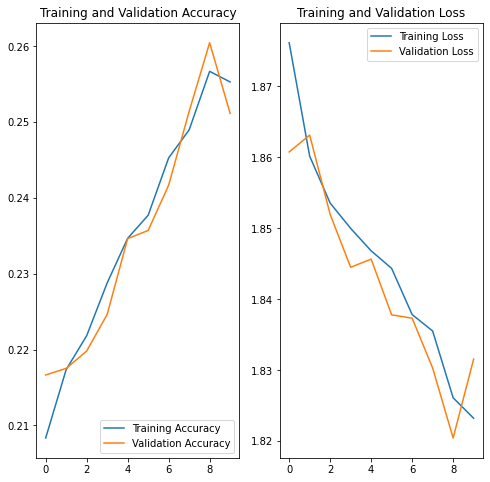

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Com essa visualização, é possível perceber que o modelo parece convergir para uma melhor acurária à medida que o número de épocas aumenta, porém, isso acontece lentamente. Na referência deste trabalho, o autor chegou a executar o modelo para 1100 épocas, obtendo uma acurácia de quase 55%.

Pode-se concluir que este modelo de Rede Neural Artificial não é o melhor classificador para o dataset trabalhado, e veremos a seguir modelos que alcançam uma taxa de acurária muito melhor com menos esforço computacional.

# Correlação Cruzada

In [12]:
from scipy import signal
import matplotlib.pyplot as plt
data_featured = pd.DataFrame()
data_prossed = pd.DataFrame()
labels = data['class'].unique()

for col in np.array([0,1,2,4,5,6]):    
    for label in labels:
        data_label = data[data['class']==label]
        acc_label_x = data_label.iloc[:,col]
        corr = signal.correlate(acc_label_x,np.ones(len(acc_label_x)),mode='same') / len(acc_label_x)
        data_featured=pd.concat([data_featured,pd.DataFrame(corr)], ignore_index=True)
        #clock= np.arange(64, len(acc_label_x), 128)
        #plt.plot(clock, corr[clock],label= label)
    data_prossed = pd.concat([data_prossed,data_featured],axis=1,ignore_index=True)
    data_featured = pd.DataFrame()
#plt.legend()
#plt.title('cross-correlation-features for AccelX')
#plt.show()

In [13]:
data_prossed['class'] = data['class']
x = data_prossed.drop(["class"],axis=1)
y = data_prossed["class"].values

In [14]:
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True)

In [15]:
import xgboost as xgb

In [16]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train,y_train)
nb = GaussianNB()
nb.fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors = 3) #n_neighbors = k
knn.fit(X_train,y_train)
svm = SVC(random_state = 1)
svm.fit(X_train,y_train)

SVC(random_state=1)

## Métricas

### Acurária

In [17]:
print("SVM accuracy is :",svm.score(X_test,y_test))
print('accuracy of bayes in test data is :', nb.score(X_test,y_test))
print('acc_of_sgd is: ', sgd.score(X_test,y_test))
print('acc_knn: ',knn.score(X_test,y_test))

SVM accuracy is : 0.8383252818035427
accuracy of bayes in test data is : 0.6289452495974235
acc_of_sgd is:  0.7513687600644122
acc_knn:  0.9997987117552335


### Matriz de confusão e relatório de classificação

Para o modelo com a maior acurácia, o KNN, foi construída abaixo a matriz de confusão e o relatório de classificação para avaliar melhor os resultados.

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

clf = knn.fit(X_train,y_train)
predicted = cross_val_predict(clf, x, y, cv=2)

In [19]:
print(confusion_matrix(y, predicted))

[[10079   158   710   669     0  2122     0]
 [  884  3077  3625  2853  1572  1181     0]
 [  434  4834  1439  1991  4206     0     0]
 [  321  4193  1669  2857   349  3225     0]
 [    0  2498  1252  3290  5111    69     0]
 [ 2877  1762   226  7525   258  1602  1458]
 [    0     0     0     0     0     0 18982]]


In [20]:
print(classification_report(y, predicted))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71     13738
           1       0.19      0.23      0.21     13192
           2       0.16      0.11      0.13     12904
           3       0.15      0.23      0.18     12614
           4       0.44      0.42      0.43     12220
           5       0.20      0.10      0.13     15708
           6       0.93      1.00      0.96     18982

    accuracy                           0.43     99358
   macro avg       0.39      0.40      0.39     99358
weighted avg       0.42      0.43      0.42     99358



#Conclusão

O melhor modelo de classificação dentre os aplicados é o KNN com uma acurácia de quase 100%.

Trabalhos futuros: aplicação das técnicas e conceitos apreendidos com este trabalho no contexto que a minha dissertação de mestrado se propõe, que acredito ser um caso mais específico do que foi trabalhado aqui.  